In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
df = pd.read_csv('concrete_data.csv')
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
616,277.0,0.0,0.0,191.0,0.0,968.0,856.0,360,33.70
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
688,108.3,162.4,0.0,203.5,0.0,938.2,849.0,3,2.33
668,153.0,102.0,0.0,192.0,0.0,888.0,943.1,3,4.78
691,212.0,141.3,0.0,203.5,0.0,973.4,750.0,3,6.81


R-squared (R²) score, also known as the coefficient of determination.proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. Indicates how well the data points fit the regression line. R² score closer to 1 means that the model fits the data well, while a score closer to 0 means that the model does not fit the data well. 

In [4]:
df.shape

(1030, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
x=df.iloc[:,:8]
y=df.iloc[:,-1]

In [8]:
x.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [9]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
x_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3


In [12]:
y_train.head()

995    27.68
507    62.05
334    23.80
848    33.40
294     7.40
Name: Strength, dtype: float64

## do Linear Regression

In [13]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

## cal r2 score

In [14]:
r2_score(y_test,y_pred)

0.6275531792314848

## calculate avg R² score from cross-validation

In [15]:
np.mean(cross_val_score(lr,x,y,scoring='r2'))

np.float64(0.4609940491662864)

## plot without transform

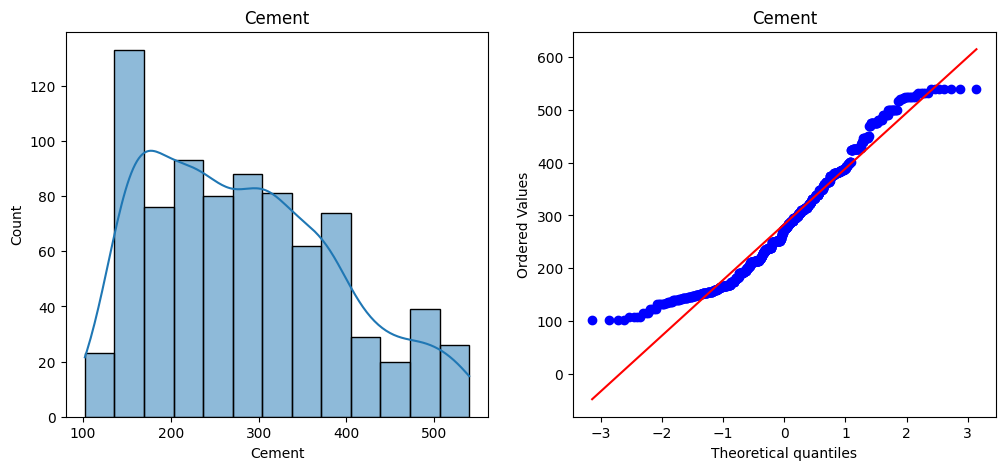

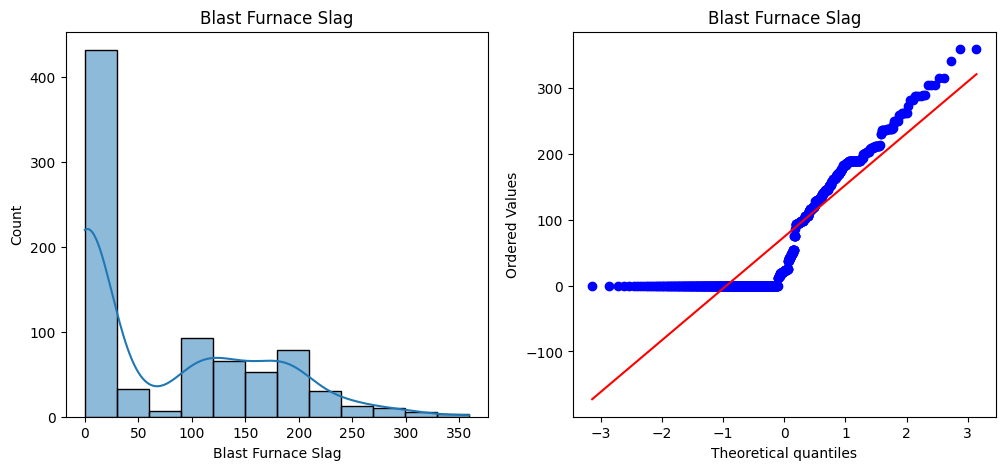

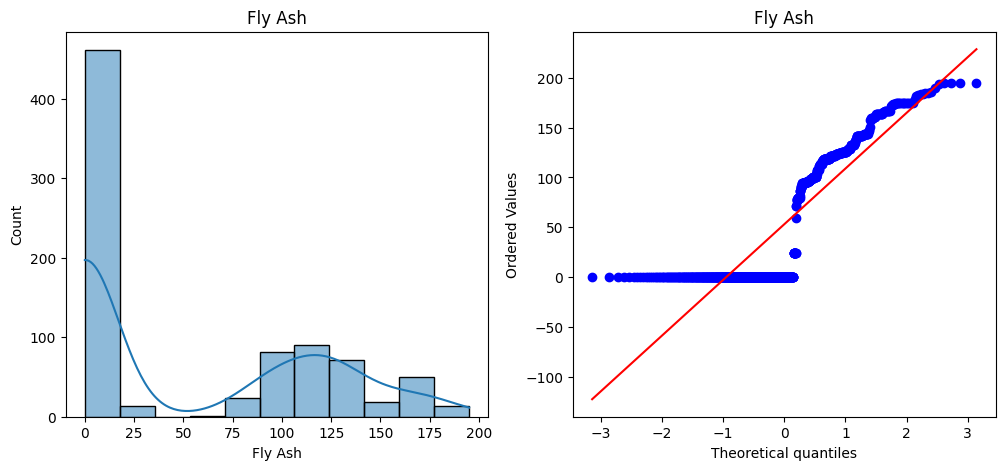

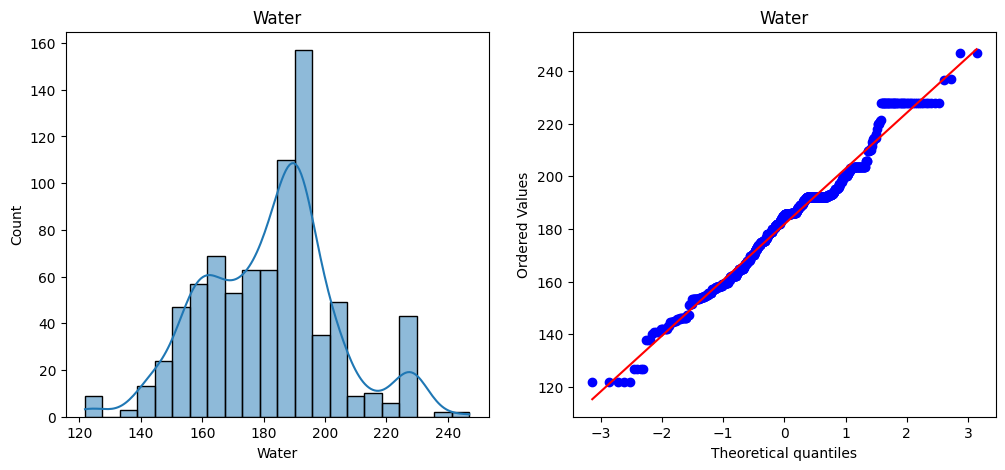

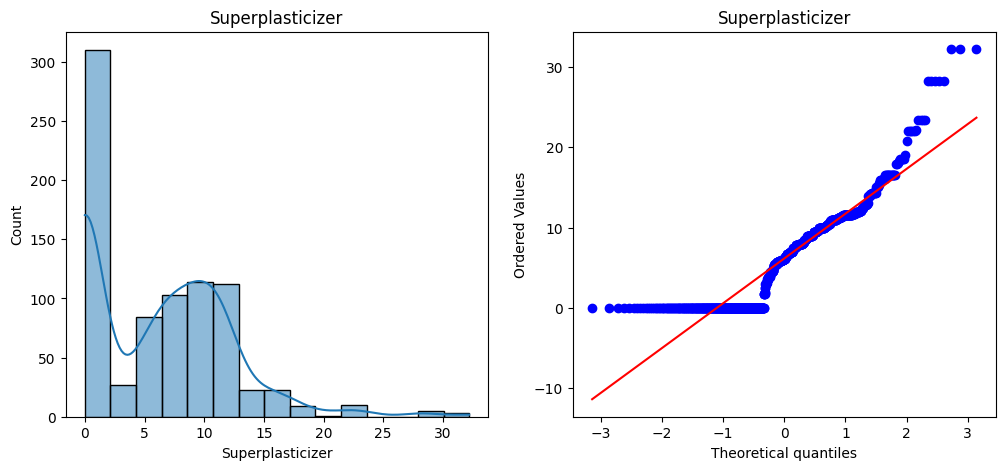

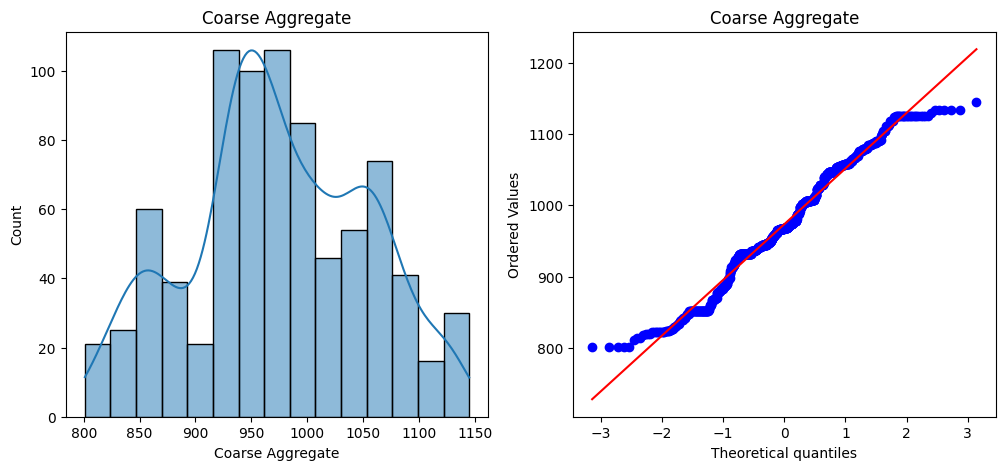

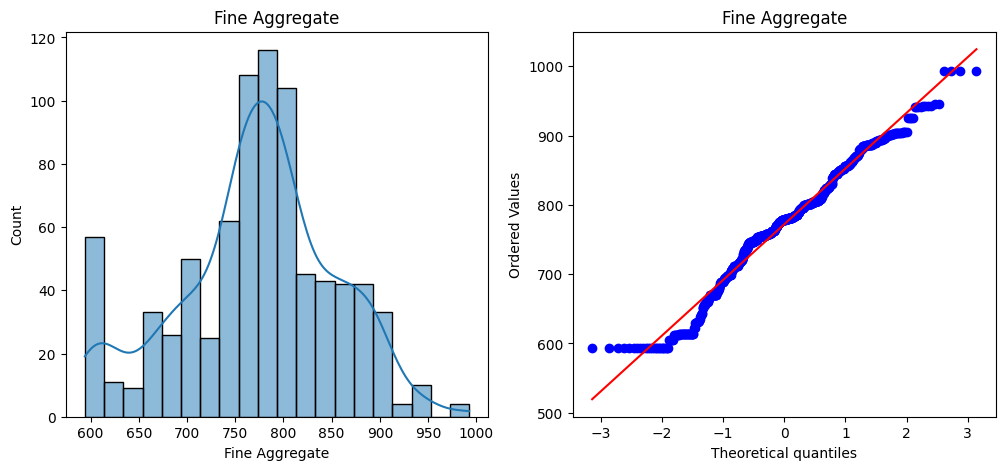

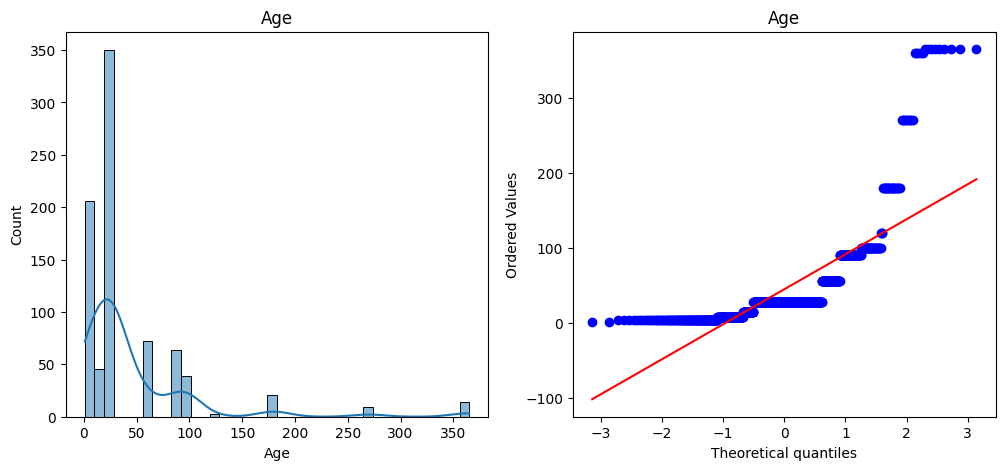

In [ ]:
for col in x_train.columns:# to plot for all cols
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.histplot(x_train[col],kde=True)
    plt.title(col)

    #QQ Plot
    plt.subplot(122)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(col)

cement,coarse,fine agg ok
blast furnace, fly ash, superplastic, age need chng
water end prblm

# Box-Cox Transform

In [19]:
pt=PowerTransformer(method='box-cox')

Box-Cox transformation can only be applied to strictly positive data

In [21]:
x_train_transformed=pt.fit_transform(x_train+0.000001)
x_test_transformed=pt.fit_transform(x_test+0.00001)

In [23]:
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.028899
2,Fly Ash,-0.007561
3,Water,0.959062
4,Superplasticizer,0.119398
5,Coarse Aggregate,1.192491
6,Fine Aggregate,1.973781
7,Age,-0.014692


## Do LR on transformed data and find r2 score

In [24]:
lr = LinearRegression()
lr.fit(x_train_transformed,y_train)
y_pred2 = lr.predict(x_test_transformed)
r2_score(y_test,y_pred2)

0.8055704275641153

Do cv

In [25]:
x_trans=pt.fit_transform(x+0.000001)
np.mean(cross_val_score(lr,x_trans,y,scoring='r2'))

np.float64(0.6662950319746159)

## plot before & after transform

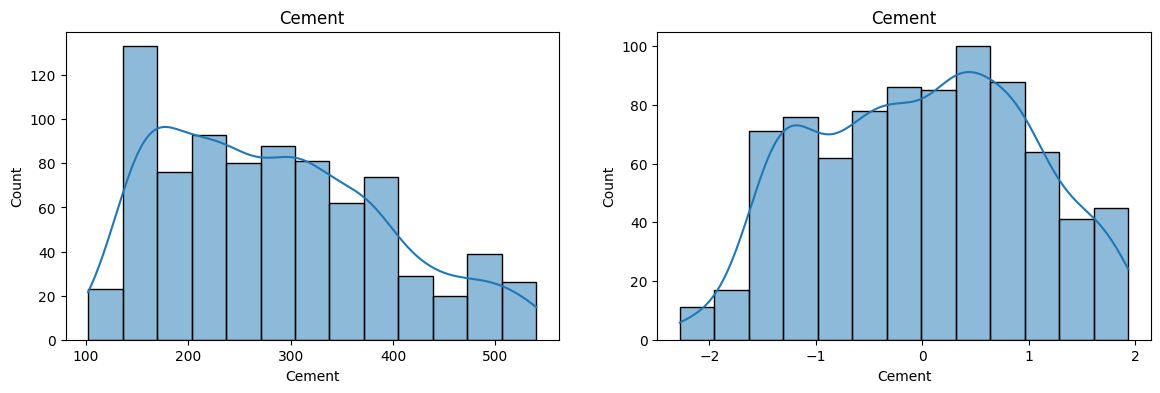

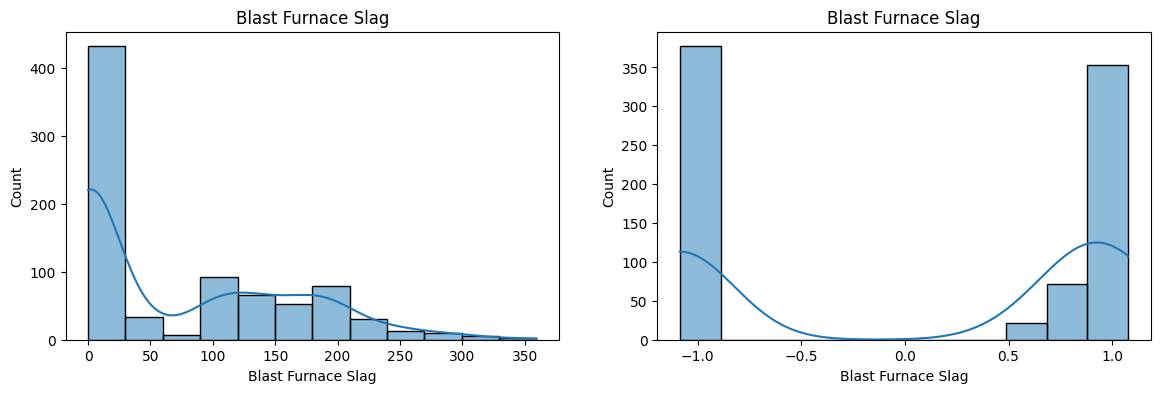

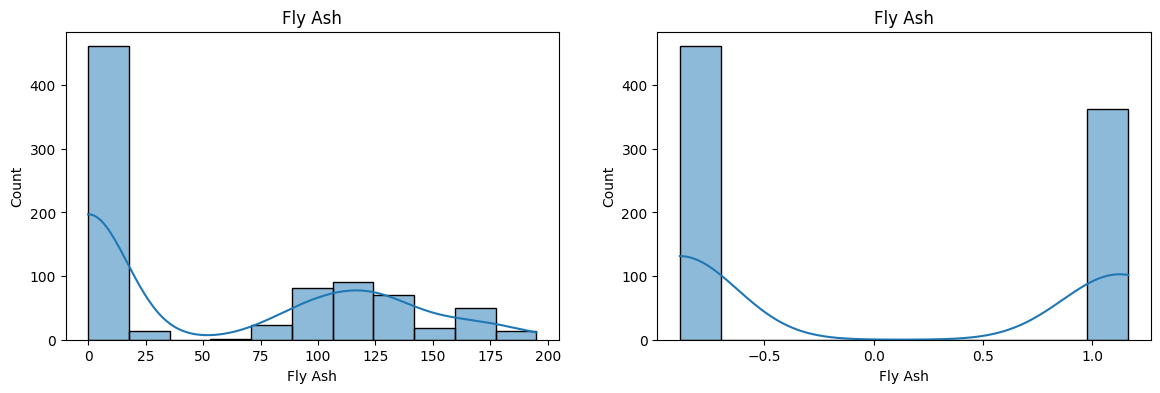

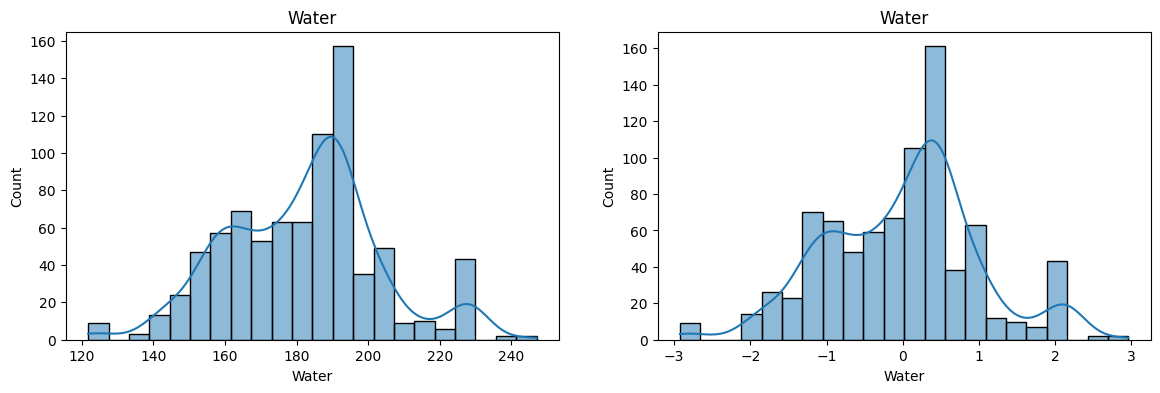

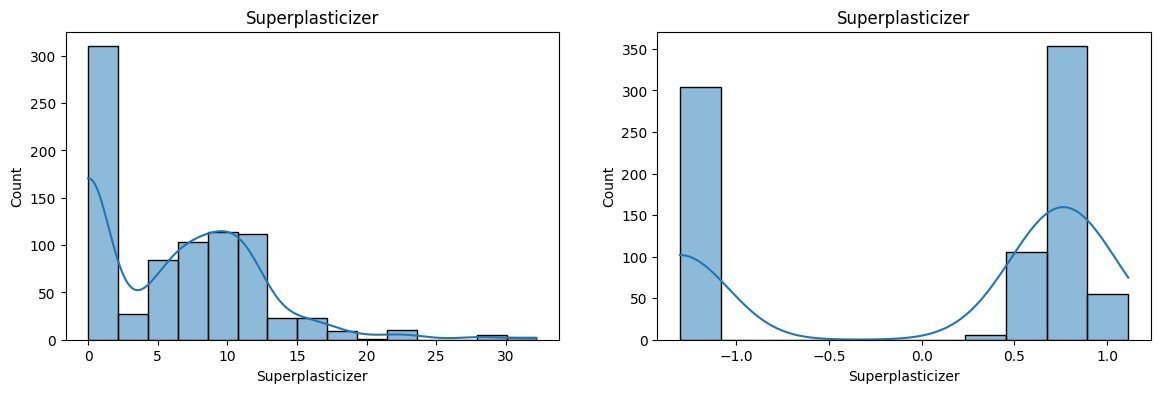

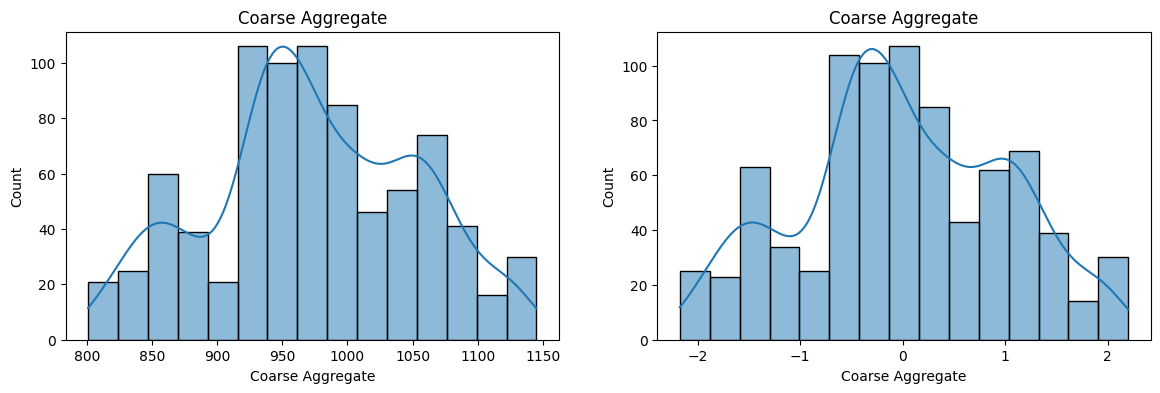

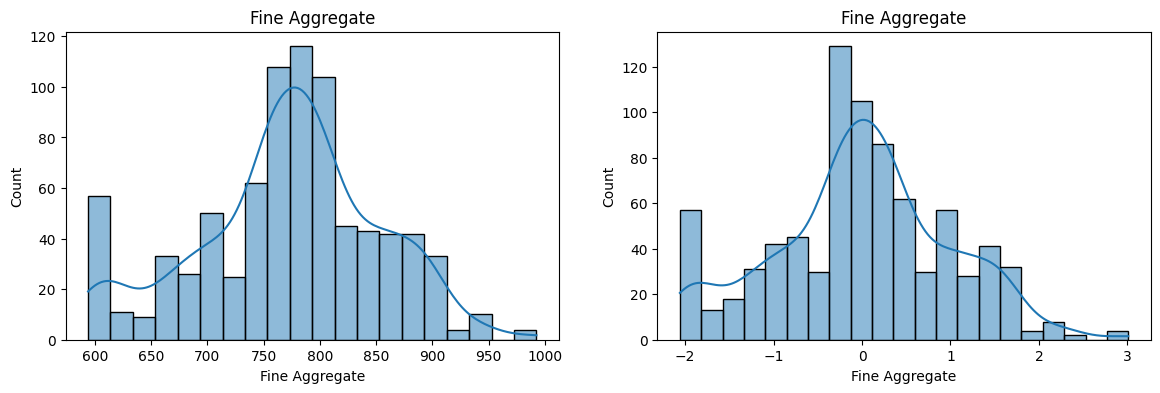

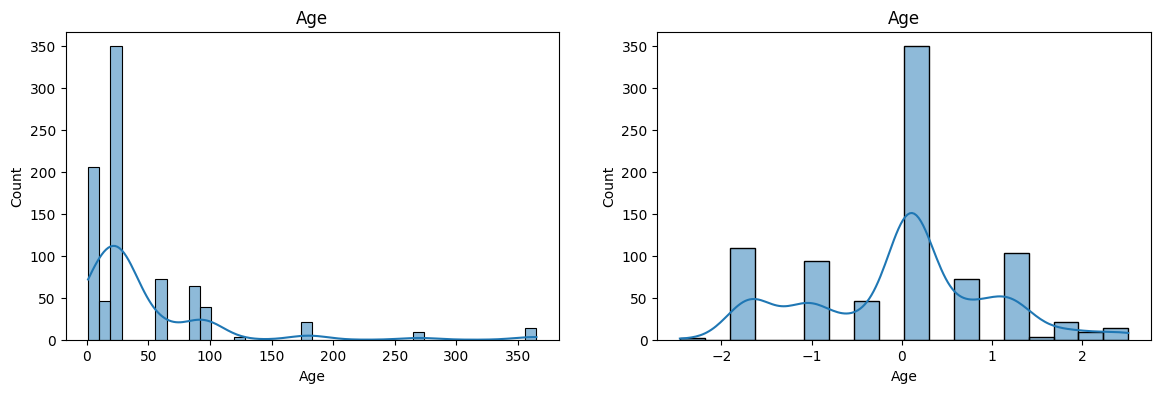

In [29]:
x_train_transformed = pd.DataFrame(x_train_transformed,columns=x_train.columns)

for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(x_train_transformed[col],kde=True)
    plt.title(col)

    #plt.subplot(122)
    #stats.probplot(x_train_transformed[col], dist="norm", plot=plt)
    #plt.title(col)

# Yeo-Johnsohn transform

In [30]:
pt1 = PowerTransformer() #nothing in bracket means yeo
x_train_transformed2 = pt1.fit_transform(x_train)
x_test_transformed2 = pt1.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_transformed2,y_train)
y_pred3 = lr.predict(x_test_transformed2)

print(r2_score(y_test,y_pred3))

0.8161906513339304


In [31]:
pd.DataFrame({'cols':x_train.columns,'Yeo_Johnsohn_lambdas':pt1.lambdas_})

,cols,Yeo_Johnsohn_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [32]:
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.172271,0.174348
1,Blast Furnace Slag,0.025273,0.015715
2,Fly Ash,-0.032412,-0.161447
3,Water,0.809568,0.771307
4,Superplasticizer,0.099711,0.253935
5,Coarse Aggregate,1.129168,1.130050
6,Fine Aggregate,1.829625,1.783100
7,Age,0.048975,0.019885
